In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install nltk

In [5]:
!pip install wordcloud

In [6]:
#loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

Loading the Dataset

In [8]:
mails = pd.read_csv('spam.csv', encoding = 'latin-1')

In [9]:
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
mails.shape

(5572, 5)

Data Cleaning: Discarding the unwanted columns using drop() function

---



In [12]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [13]:
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming the columns using rename() function

In [15]:
mails.rename(columns = {'v1': 'spam', 'v2': 'message'}, inplace = True)
mails.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Mapping ham and spam to the boolean values

In [17]:
mails['spam'] = mails['spam'].map({'ham': False, 'spam': True})
mails.head()

,spam,message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
mails['spam'].value_counts()

spam
False    4825
True      747
Name: count, dtype: int64

Splitting dataset (train + test
)

In [20]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(mails, train_size=0.70, random_state=42)

spam_counts = train_data['spam'].value_counts()
print(spam_counts)


spam
False    3372
True      528
Name: count, dtype: int64


In [21]:
display(train_data)

,spam,message
708,True,To review and KEEP the fantastic Nokia N-Gage ...
4338,False,Just got outta class gonna go gym.
5029,False,Is there coming friday is leave for pongal?do ...
4921,False,Hi Dear Call me its urgnt. I don't know whats ...
2592,False,My friend just got here and says he's upping h...
...,...,...
3772,False,I came hostel. I m going to sleep. Plz call me...
5191,False,"Sorry, I'll call later"
5226,False,Prabha..i'm soryda..realy..frm heart i'm sory
5390,False,Nt joking seriously i told


In [22]:
display(test_data)

,spam,message
3245,False,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,False,I sent my scores to sophas and i had to do sec...
1044,True,We know someone who you know that fancies you....
2484,False,Only if you promise your getting out as SOON a...
812,True,Congratulations ur awarded either å£500 of CD ...
...,...,...
2505,False,Congrats kano..whr s the treat maga?
2525,False,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
4975,False,You are gorgeous! keep those pix cumming :) th...
650,False,Thats cool! Sometimes slow and gentle. Sonetim...


In [23]:
def count_words(data):
    counter = collections.OrderedDict()
    for message in data:
        for word in message.split(' '):
            if word in counter:
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [24]:
spam_messages = set(train_data[train_data['spam'] == True]['message'])
spam_words = count_words(spam_messages)
ham_messages = set(train_data[train_data['spam'] == False]['message'])
ham_words = count_words(ham_messages)

Visualizing the data.
User defined function for counting the number of words

Bar chart

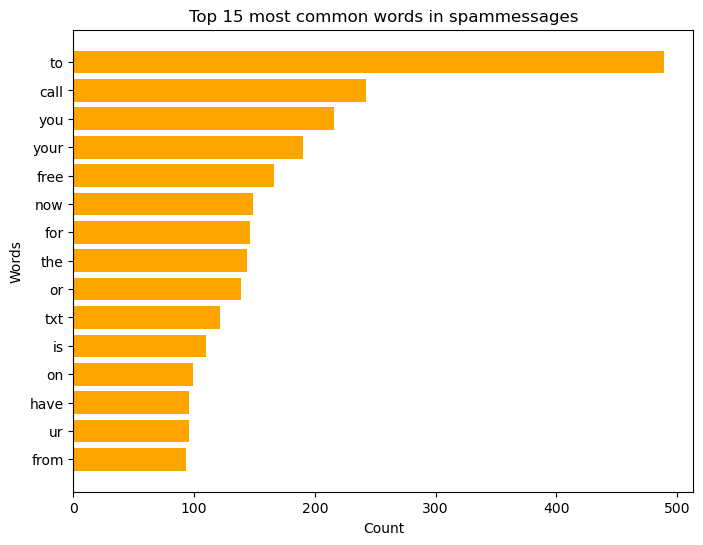

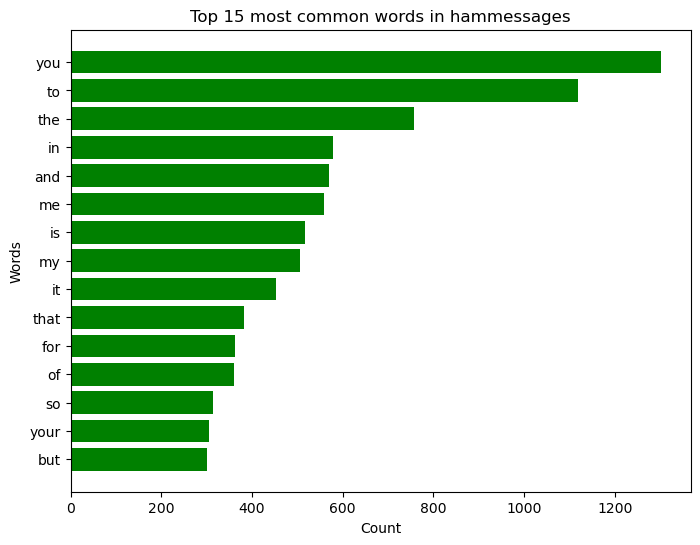

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Assuming 'train_data' is a pandas DataFrame with columns 'message' and 'spam'

def visualize_top_words(data, column, label_column, label_value, top=15, messages_type="", color="#1f77b4"):
    """
    Visualizes the top N words for a specified label in the dataset.

    Parameters:
        data (pd.DataFrame): Input DataFrame.
        column (str): Column containing text messages.
        label_column (str): Column with spam/ham labels.
        label_value (bool): Value indicating spam or ham.
        top (int): Number of top words to display.
        messages_type (str): Type of message (spam/ham).
        color (str): Color for the bar chart.
    """
    # Filter messages based on label value
    filtered_messages = data[data[label_column] == label_value][column]

    # Use CountVectorizer to tokenize and count words
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(filtered_messages)
    word_sum = np.array(word_counts.sum(axis=0)).flatten()
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_sum))

    # Sort and take the top N words
    top_words = Counter(word_freq).most_common(top)
    words, counts = zip(*top_words[::-1])  # Reverse for horizontal bar plot

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.barh(words, counts, color=color)
    plt.title(f"Top {top} most common words in {messages_type}messages")
    plt.xlabel("Count")
    plt.ylabel("Words")
    plt.show()

# Visualizing top words in spam and ham messages
visualize_top_words(train_data, column="message", label_column="spam", label_value=True,
                    top=15, messages_type="spam", color="orange")
visualize_top_words(train_data, column="message", label_column="spam", label_value=False,
                    top=15, messages_type="ham", color="green")


Processing data:
1. Convert all the words to lowercase
2. Tokenize the data
3. Remove single characters
4. Remove stop words
5. Perform stemming

In [29]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sastra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
# Define preprocessing utilities
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def process_message(message, wordlist=None):
    """
    Preprocess a message by tokenizing, removing stopwords, stemming, and filtering for English words.

    Parameters:
        message (str): Input message as a string.
        wordlist (set): Set of valid English words for filtering (optional).

    Returns:
        list: List of preprocessed words from the message.
    """
    if not message or not isinstance(message, str):
        raise ValueError("Message must be a non-empty string.")

    words = message.lower()  # Convert to lowercase
    words = word_tokenize(words)  # Tokenize
    words = [word for word in words if len(word) > 1]  # Remove single-character tokens
    words = [word for word in words if word not in stop_words]  # Remove stop words
    words = [stemmer.stem(word) for word in words]  # Apply stemming
    return words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sastra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sastra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sastra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Visualizing data
Top spam words in the training dataset:

function for counting words in a dataset

In [33]:
def count_processed_words(data):
    counter = collections.OrderedDict()
    for message in data:
        words = process_message(message)
        for word in set(words):
            if word in counter:
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [34]:
spam_messages = set(train_data[train_data['spam'] == True]['message'])
ham_messages = set(train_data[train_data['spam'] == False]['message'])


spam_words = count_processed_words(spam_messages)
ham_words = count_processed_words(ham_messages)

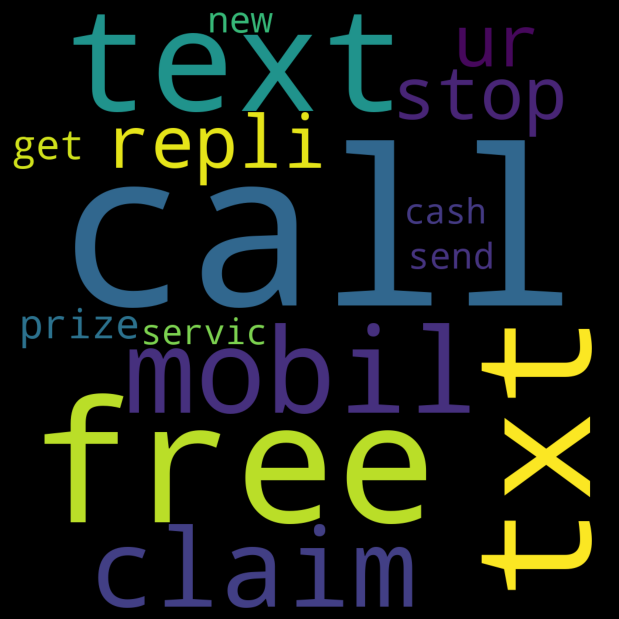

In [35]:
spam_wc = WordCloud(width = 1024,height = 1024, max_words=15).generate_from_frequencies(spam_words)
plt.figure(figsize = (8, 6), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Top ham words in the training dataset:

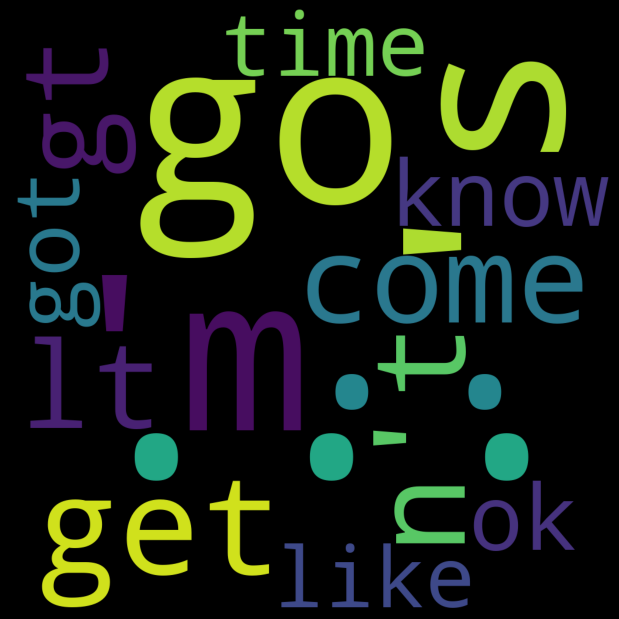

In [37]:
spam_wc = WordCloud(width = 1024,height = 1024, max_words=15).generate_from_frequencies(ham_words)
plt.figure(figsize = (8, 6), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Spam classification

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Preprocess the training and test messages
train_data['preprocessed_message'] = train_data['message'].apply(
    lambda x: ' '.join(process_message(x))
)
test_data['preprocessed_message'] = test_data['message'].apply(
    lambda x: ' '.join(process_message(x))
)


# Step 1: Apply Count Vectorization to the preprocessed messages
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['preprocessed_message'])
y_train = train_data['spam']
X_test = vectorizer.transform(test_data['preprocessed_message'])
y_test = test_data['spam']



# Step 2: Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 3: Define the Spam Probability Function (already provided)
def spam(message, model=nb_model, vectorizer=vectorizer, percentage=True):
    if not message or not isinstance(message, str):
        raise ValueError("Message must be a non-empty string.")

    # Preprocess the message
    preprocessed_message = ' '.join(process_message(message))  # Join words back into a string

    # Transform the message using the pre-trained vectorizer
    message_vectorized = vectorizer.transform([preprocessed_message])

    # Predict the probability of the message being spam
    spam_prob = model.predict_proba(message_vectorized)[0, 1]  # Probability of spam (class 1)

    if percentage:
        print(f"Spam probability: {spam_prob * 100:.2f}%")
    return spam_prob > 0.5 if not percentage else spam_prob * 100


Testing the spam filter

In [41]:
spam("Join SoftUni, FREE Programming Basics course! Don't miss out on this offer! Become a code wizard GUARANTEED!")

Spam probability: 99.15%


99.15254356141642

In [42]:
spam("Hey man, SoftUni is pretty great. This Data Science course? Highly recommend.")

Spam probability: 0.00%


0.0011153990587266817

In [43]:
spam("Call me when you are done ", percentage=True)

Spam probability: 9.25%


9.254055075279242

In [44]:
spam("Call me now to win a FREE prize!", percentage=True)

Spam probability: 99.98%


99.97671529981187

In [45]:
spam("Bro you look like a moonpie", percentage = True)

Spam probability: 0.37%


0.3717249492699069

In [46]:
spam("Call now to win a FREE prize!", percentage=True)

Spam probability: 99.98%


99.97671529981187

Overall Performance

In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score



# Generate predictions
y_pred = nb_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print("Confusion Matrix:")
print(cm)
print(f"\nTrue Positive: {TP}")
print(f"False Negative: {FN}")
print(f"True Negative: {TN}")
print(f"False Positive: {FP}\n")
print(f"Precision (Spam): {precision:.2f}%")
print(f"Recall (Spam): {recall:.2f}%")
print(f"F1 Score (Spam): {f1:.2f}%")
print(f"\nAccuracy: {accuracy:.2f}%")


Confusion Matrix:
[[1444    9]
 [  21  198]]

True Positive: 198
False Negative: 21
True Negative: 1444
False Positive: 9

Precision (Spam): 95.65%
Recall (Spam): 90.41%
F1 Score (Spam): 92.96%

Accuracy: 98.21%
